# **Background**

## **1. Phonon calculation:**
- 

# **Phonon Calculation**

##**1. Structure relaxation**###

- Run the structure relaxation with ```POSCAR, KPOINTS, INCAR, POTCAR, job```.
- Example of $SiO_{2}$ ```POSCAR``` can be found [here](https://phonopy.github.io/phonopy/input-files.html)




- Important parameter:
```
ISYM = 1
```



##**2.Phonon calculations**

###**2.1 Pre-process**
- Use ```CONTCAR, KPOINTS, INCAR, POTCAR, job``` from step 1 to continue the calculation.
- Run the following command to convert ```CONTCAR``` to ```POSCAR```:
```
cp CONTCAR POSCAT
rm CONTCAR
```
- Obtain the supercells with displacements:
```
phonopy -d --dim = "2 2 3"
```
- This code generates following files:
```
disp.yaml POSCAR-001 POSCAR-002 POSCAR-003 SPOSCAR
```
  + The number of POSCAR-{number} will very


###**2.2 Calculation of sets of forces**
- Example of ```INCAR``` for the case of $SiO_{2}$ : **NSW = 0 because we do not want to relax the structures.**
```
PREC = Accurate
IBRION = -1
ENCUT = 500
EDIFF = 1.0e-08
ISMEAR = 0; SIGMA = 0.01
IALGO = 38
LREAL = .FALSE.
ADDGRID = .TRUE.
LWAVE = .FALSE.
LCHARG = .FALSE.
```
- Create folder ```disp-{number}``` for each ```POSCAR``` by following commands:
```
# Copy POSCAR-{number}, KPOINTS, INCAR, POTCAR, job into the corresponding disp-{number}
for i in {001..003}; do echo $i; mkdir dis-$i; cp KPOINTS POTCAR INCAR job POSCAR-$i disp-$i; done
```
```
# Change name of POSCAR-{number} to POSCAR and then remove POSCAR-{number} in each disp-{number}
for i in {001..003}; do echo $i; cd disp-$i; cp POSCAR-$i POSCAR; rm POSCAR-$i; cd ..;done
```
```
# Submit job
for i in {001..003} ; do echo $i ; cd disp-$i ; sbatch job ; cd .. ; done
```
- Create ```PORCE_SETS```
```
$ phonopy -f disp-{001..003}/vasprun.xml 
```

###**2.3 Post-process**
- Create a ```mesh.conf``` by the following commands:
```vim mesh.conf```
```
ATOM_NAME = Si O
DIM = 2 2 3
MP = 8 8 8
```
- In the following steps, use ```-s``` option to generate the PDF file.


- Calulate the thermal properties with the sampling mesh:
```
$ phonopy -t mesh.conf$
```
- After running this command, the table of thermal properties - including temperature, free-entropy, entropy, heat_capacity, and energy - will appear on the terminal. The similar data will be stored in ```thermal_properties.yaml``` file. However, it is easier to plot when we use the table appearing on the terminal.
- Copy the table into Excel
- The problem is that these 5 columns will convert into 1 column in Excel. Solve this problem by following these steps:
```
Data > Text to Columns > Next > Next > Finish
```   

######**2.3.1 Density of states (DOS)**
- Plot the density of states by:
```
$ phonopy -p -s mesh.conf
```
  + The plot will be saved as ```total_dos.pdf```
- Data transfer:
```
# On the cluster, check the path to go to the file
$ pwd
```
```
# On the local machine, use this command to download the file from the cluster
(local folder) $ scp <userID>@lrc-xfer.lbl.gov:<path_to_cluster_current_file_pwd> .
``` 

#####**2.3.2 Thermal properties**
- Calculate the thermal properties with the sampling mesh:
```
$ phonopy -t mesh.conf$
```
- After running this command, the table of thermal properties - including temperature, free-entropy, entropy, heat_capacity, and energy - will appear on the terminal. The similar data will be stored in ```thermal_properties.yaml``` file. However, it is easier to plot when we use the table appearing on the terminal.
- Copy the table into Excel.
- The problem is that these 5 columns will convert into 1 column in Excel. Solve this problem by following these steps:
```
Data > Text to Columns > Next > Next > Finish
```   
- At the end, we will use these information to generate the plot.

#####**2.3.3 Projected DOS**
- Create ```pdos.conf```:
```
ATOM_NAME = Si O
DIM = 2 2 3
MP = 8 8 8
PDOS = 1 2, 3 4 5 6
```
- Plot the projected DOS:
```
phonopy -p -s pdos.conf
```
- Data transfer.


#####**2.3.4 Band structure**
- Create ```band.conf```:
```
ATOM_NAME = Si O
DIM = 2 2 3
BAND = 0.5 0.5 0.5 0.0 0.0 0.0 0.5 0.5 0.0 0.0 0.5 0.0
```
- Plot the band structure:
```
$ phonopy -p -s band.conf
```
  + The plot will be saved as ```band.pdf```
- Data transfer.

###**2.4 Plot the thermal properties**

###**2.4.1 Upload the file to Google Collab**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Upload the file (Only run it once time to upload file)
from google.colab import files
uploaded = files.upload()

Saving thermal_properties.csv to thermal_properties.csv


In [24]:
# Read the file
import io
data = pd.read_csv(io.BytesIO(uploaded['thermal_properties.csv']))# Dataset is now stored in a Pandas Dataframe

In [25]:
data

,T [K],F [kJ/mol],S [J/K/mol],C_v [J/K/mol],E [kJ/mol]
0,0,59.807593,0.000000,0.000000,59.807593
1,10,59.807593,0.000059,0.000572,59.807593
2,20,59.807570,0.007573,0.038269,59.807722
3,30,59.807338,0.045815,0.182522,59.808712
4,40,59.806475,0.138127,0.518120,59.812000
...,...,...,...,...,...
96,960,-32.205218,192.787241,140.423564,152.870534
97,970,-34.140382,194.243354,140.603119,154.275672
98,980,-36.090041,195.686347,140.777583,155.682579
99,990,-38.054066,197.116437,140.947143,157.091207


In [26]:
# Check the data column names
data.columns

Index(['T [K]', 'F [kJ/mol]', 'S [J/K/mol]', 'C_v [J/K/mol]', 'E [kJ/mol]'], dtype='object')

In [27]:
# Rename the data column names
thermal = data.rename(columns={"T [K]": "T", 
                            "F [kJ/mol]": "F", 
                            "S [J/K/mol]": "S", 
                            "C_v [J/K/mol]": "C_v", 
                            "E [kJ/mol]": "E"})
thermal

,T,F,S,C_v,E
0,0,59.807593,0.000000,0.000000,59.807593
1,10,59.807593,0.000059,0.000572,59.807593
2,20,59.807570,0.007573,0.038269,59.807722
3,30,59.807338,0.045815,0.182522,59.808712
4,40,59.806475,0.138127,0.518120,59.812000
...,...,...,...,...,...
96,960,-32.205218,192.787241,140.423564,152.870534
97,970,-34.140382,194.243354,140.603119,154.275672
98,980,-36.090041,195.686347,140.777583,155.682579
99,990,-38.054066,197.116437,140.947143,157.091207


###**2.4.2 Plotting**


#### Matplotlib and Seaborn Table of Common Functions

`x` and `y` are sequences of values.

| Function | Description |
| -------- | ----------- |
| `plt.plot(x, y)` | Creates a line plot of `x` against `y` |
| `plt.title(name)` | Adds a title `name` to the current plot |
| `plt.xlabel(name)` | Adds a label `name` to the x-axis |
| `plt.ylabel(name)` | Adds a label `name` to the y-axis |
| `plt.scatter(x, y)` | Creates a scatter plot of `x` against `y` |
| `plt.hist(x, bins=None)` | Creates a histogram of `x`; `bins` can be an integer or a sequence |
| `plt.bar(x, height)` | Creates a bar plot of categories `x` and corresponding heights `height` |
| `sns.distplot(data, x, y, hue, kind)` | Creates a distribution plot; `data` is a DataFrame; `x`, `y` are column names in `data` that specify positions on the x and y axes; `hue` is a column name in `data` that adds subcategories to the plot based on `hue`; `kind` determines the visualization type, can be `hist` or `kde` |
|`sns.lineplot(data, x, y, hue)` | Creates a line plot |
|`sns.scatterplot(data, x, y, hue, size)` | Creates a scatter plot; `size` is a vector that contains the size of point for each subcategory based on `hue` |
|`sns.kdeplot(x, y)` |  Creates a kernel density estimate plot; `x`, `y` are series of data that indicate positions on the `x` and `y` axis |
|`sns.jointplot(x, y, data, kind)` | Creates a joint plot of 2 variables with KDE plot in the middle and a distribution plot for each variable on the sides; `kind` determines the visualization type for the distribution plot, can be `scatter`, `kde` or `hist` |

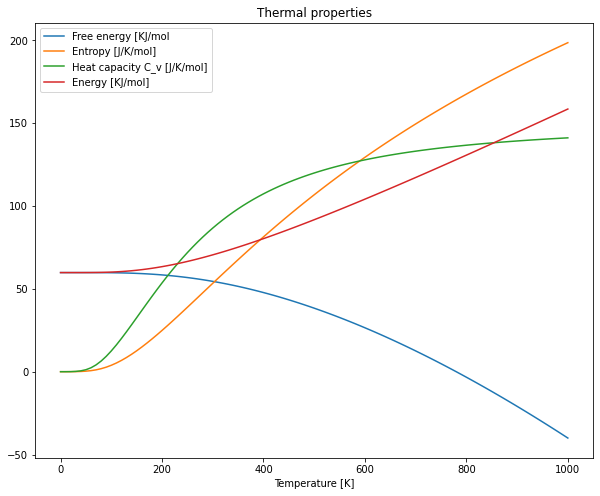

In [44]:
plt.figure(figsize=(10,8))
sns.lineplot(data = thermal, x = "T", y = "F", label = 'Free energy [KJ/mol');
sns.lineplot(data = thermal, x = "T", y = "S", label = 'Entropy [J/K/mol]');
sns.lineplot(data = thermal, x = "T", y = "C_v", label = 'Heat capacity C_v [J/K/mol]');
sns.lineplot(data = thermal, x = "T", y = "E", label = 'Energy [KJ/mol]');
plt.xlabel('Temperature [K]');
plt.ylabel('')
plt.title('Thermal properties')
plt.legend();